In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('./data/spam.csv', encoding ="latin-1",)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
np.sum(df[df.columns[2:]].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [21]:
df_no_Nan = df.dropna(axis =1)
df_no_Nan.columns = ['class', 'content']
df_no_Nan

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='class', ylabel='count'>

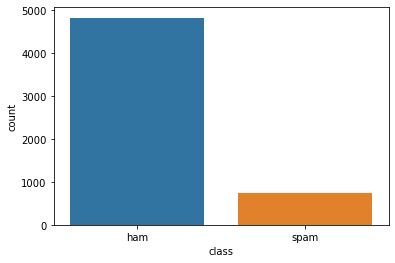

In [22]:
sns.countplot(data = df_no_Nan, x = 'class')

In [23]:
df_onehot = pd.get_dummies(df_no_Nan, columns = ['class'], drop_first= True )

X,y = df_onehot['content'], df_onehot['class_spam']

## TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words= 'english')
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(X_tfidf)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)
X_train, X_test

(<3733x8404 sparse matrix of type '<class 'numpy.float64'>'
 	with 29001 stored elements in Compressed Sparse Row format>,
 <1839x8404 sparse matrix of type '<class 'numpy.float64'>'
 	with 14477 stored elements in Compressed Sparse Row format>)

<AxesSubplot:xlabel='class_spam', ylabel='count'>

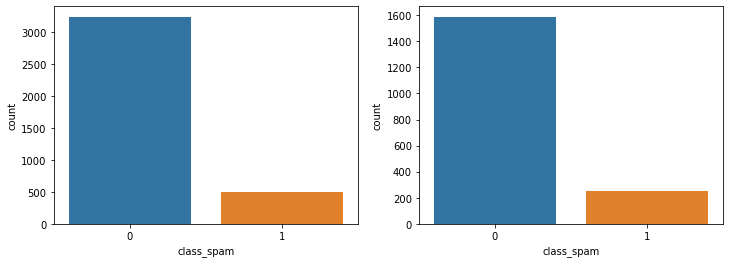

In [26]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.countplot(x = y_train, ax = ax[0])
sns.countplot(x = y_test, ax =ax[1])

## Naive Bayes

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



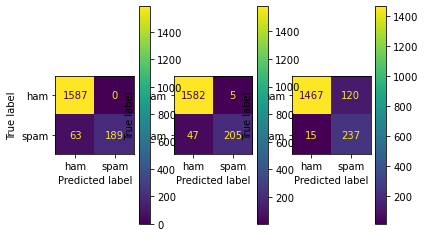

In [31]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(),
    complement = ComplementNB()
)

fig, axs = plt.subplots(1,3)

def evaluate_model(model, pos):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam']).plot(ax = axs[pos])

for i, value in enumerate(naive_bayes.values()):
    evaluate_model(value, i)

In [32]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC

vote_classifier = VotingClassifier([
    ('rf', RandomForestClassifier()),
    ("svc", LinearSVC()),
    ('complement', ComplementNB()),
    ('bernoulli', BernoulliNB()),
    ('multinomial', MultinomialNB())
])



In [35]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words='english')), ('vote', vote_classifier)
])

pipe.fit(X, y)
#pipe.predict

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('vote',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('svc', LinearSVC()),
                                              ('complement', ComplementNB()),
                                              ('bernoulli', BernoulliNB()),
                                              ('multinomial',
                                               MultinomialNB())]))])

In [36]:
pipe.predict(["comme and collect your $1000 Bitcoin"])

array([1], dtype=uint8)